In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
#read in the data
data1 = pd.read_csv("data/corona_tested_individuals_ver_006_march_april.english.csv")
data2 = pd.read_csv("data/corona_tested_individuals_ver_0083_september_november.english.csv")

/var/folders/kt/92wnzvcj6qq_r6j3j19yp5lw0000gp/T/ipykernel_718/581540614.py:2: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("data/corona_tested_individuals_ver_006_march_april.english.csv")
/var/folders/kt/92wnzvcj6qq_r6j3j19yp5lw0000gp/T/ipykernel_718/581540614.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("data/corona_tested_individuals_ver_0083_september_november.english.csv")


In [14]:
# Take the processing function from hackathon_lgbm.ipynb to process the 0083 data

def prepareData(X):
    X = X.dropna()
    X = X.copy().query('gender != "None"')
    X = X.query('corona_result != "other"')
    X['test_indication'] = X['test_indication'].map({'Contact with confirmed': 1, 'Other': 0, 'Abroad': 0})
    X['age_60_and_above'] = X['age_60_and_above'].map({'Yes': 1, 'No': 0})
    X['gender'] = X['gender'].map({'male': 1, 'female': 0})
    X['corona_result'] = X['corona_result'].map({'positive': 1, 'negative': 0})
    X = X.copy().query('cough != "None"')
    X = X.copy().query('fever != "None"')
    X = X.copy().query('sore_throat != "None"')
    X = X.copy().query('shortness_of_breath != "None"')
    X = X.copy().query('head_ache != "None"')
    X['cough'] = X['cough'].astype(int)
    X['fever'] = X['fever'].astype(int)
    X['sore_throat'] = X['sore_throat'].astype(int)
    X['shortness_of_breath'] = X['shortness_of_breath'].astype(int)
    X['head_ache'] = X['head_ache'].astype(int)
    X['gender'] = X['gender'].astype(int)
    X = X.drop(['test_date'],axis = 1)
    return X

In [30]:
data_processed1 = prepareData(data1)
data_processed2 = prepareData(data2)

/var/folders/kt/92wnzvcj6qq_r6j3j19yp5lw0000gp/T/ipykernel_718/3264763642.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['test_indication'] = X['test_indication'].map({'Contact with confirmed': 1, 'Other': 0, 'Abroad': 0})
/var/folders/kt/92wnzvcj6qq_r6j3j19yp5lw0000gp/T/ipykernel_718/3264763642.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age_60_and_above'] = X['age_60_and_above'].map({'Yes': 1, 'No': 0})
/var/folders/kt/92wnzvcj6qq_r6j3j19yp5lw0000gp/T/ipykernel_718/3264763642.py:9: Setti

In [38]:
#check for nas
print(data_processed1.isna().sum())
print(data_processed2.isna().sum())

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64


In [37]:
#drop nas from data_processed1
data_processed1.dropna(inplace = True)

<AxesSubplot:>

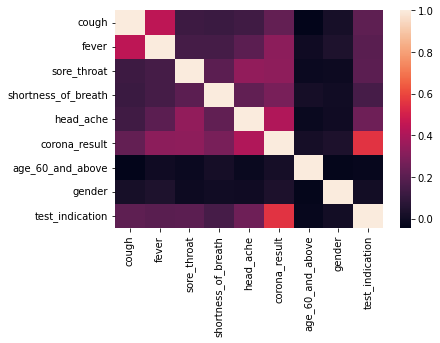

In [39]:
#plot a correlation heatmap for all variables in data1 
sns.heatmap(data_processed1.corr(), xticklabels=data_processed1.columns, yticklabels=data_processed1.columns)

<AxesSubplot:>

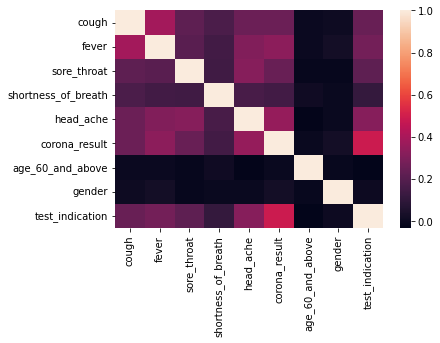

In [40]:
#plot a correlation heatmap for all variables in data2
sns.heatmap(data_processed2.corr(), xticklabels=data_processed2.columns, yticklabels=data_processed2.columns)

## Training and Testing for March - April 2020

In [44]:
#create a train test split

X1 = data_processed1.drop(['corona_result'],axis = 1)
y1 = data_processed1.copy()['corona_result']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2,random_state = 2022, stratify = y1)

In [45]:
#create the random forest model
rf_model1 = RandomForestClassifier()
rf_model1.fit(X_train1, y_train1)

RandomForestClassifier()

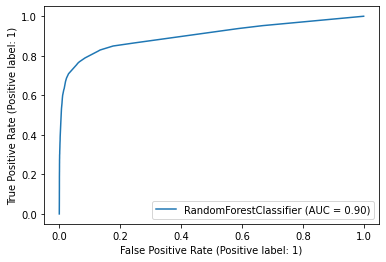

In [46]:
from sklearn.metrics import RocCurveDisplay
rf_disp1 = RocCurveDisplay.from_estimator(rf_model1, X_test1, y_test1)
plt.show()

In [47]:
#show the variable importance in the rf model
pd.DataFrame(rf_model1.feature_importances_, index=X_train1.columns).sort_values(by=0, ascending=False)

,0
test_indication,0.462615
head_ache,0.198545
sore_throat,0.106114
fever,0.100752
shortness_of_breath,0.076962
cough,0.040328
age_60_and_above,0.009248
gender,0.005436


## Testing our trained model on data from later in the year (September to November 2020)

In [48]:
#create a train test split

X2 = data_processed2.drop(['corona_result'],axis = 1)
y2 = data_processed2.copy()['corona_result']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2,random_state = 2022, stratify = y2)

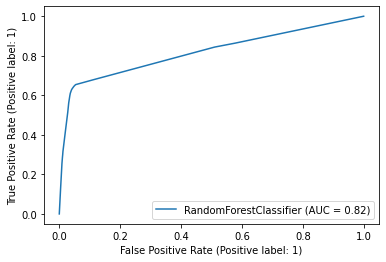

In [49]:
#test the model trained in March - April 2020 for September - November 2020
rf_disp2 = RocCurveDisplay.from_estimator(rf_model1, X_test2, y_test2)
plt.show()

## Retrain the model for the second half of the year and compare accuracy

In [50]:
#create the random forest model
rf_model2 = RandomForestClassifier()
rf_model2.fit(X_train2, y_train2)

RandomForestClassifier()

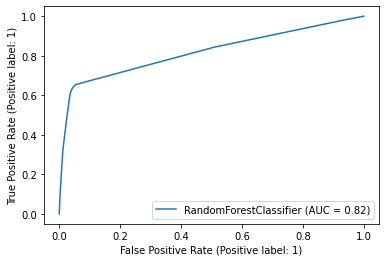

In [51]:
#test the model trained for September - November 2020
rf_disp2 = RocCurveDisplay.from_estimator(rf_model2, X_test2, y_test2)
plt.show()

In [52]:
#show the variable importance in the rf model
pd.DataFrame(rf_model1.feature_importances_, index=X_train1.columns).sort_values(by=0, ascending=False)

,0
test_indication,0.462615
head_ache,0.198545
sore_throat,0.106114
fever,0.100752
shortness_of_breath,0.076962
cough,0.040328
age_60_and_above,0.009248
gender,0.005436
